# Absolutely, supporting each other is important! If you share your notebook or any work you're proud of, I'd be happy to take a look and provide feedback. Keep up the good work!

![img](https://i.ytimg.com/vi/B-ph18b3X7Y/maxresdefault.jpg)

# Objectives

1. How salaries in the field of Data Science have evolved over the years 2021 to 2023.
2. The impact of work experience on salary levels within the industry.
3. Variations in salary distributions across different job titles or roles within Data Science.
4.  Regional differences in salary levels, considering company locations.
5. The relationship between company size and salary offerings in the Data Science field.

work_year: Represents the specific year of salary data collection. This column likely indicates when the salary information was collected for each employee.

Experience_level: Represents the level of work experience of the employees. It is categorized as EN (Entry-Level), EX (Experienced), MI (Mid-Level), and SE (Senior).

Employment_type: Indicates the type of employment for the employees. It is labelled as FT (Full-Time), CT (Contractor), FL (Freelancer), and PT (Part-Time).

Job_title: Contains the job titles of the employees. This column provides information about the roles or positions held by the employees, such as "Applied Scientist", "Data Quality Analyst", etc.

Salary: Contains the salary figures in their respective currency formats. This column provides information about the salaries earned by the employees.

Salary_currency: Represents the currency code corresponding to the salary figures. It provides information about the currency in which the salaries are denoted.

Salary_in_usd: Contains the converted salary figures in USD for uniform comparison. This column likely provides the salary amounts converted to a common currency (USD) to facilitate comparison across different currencies.

Company_location: Indicates the location of the companies where the employees work. It is specified as country codes (e.g., "US" for the United States and "NG" for Nigeria).

Company_size: Represents the size of the companies where the employees work. It is classified as "L" (Large), "M" (Medium), and "S" (Small). This column provides information about the scale or magnitude of the companies.

## 1. Data Preprocessing:

* Load the dataset into the notebook.

* Check for missing values and handle them appropriately (e.g., imputation or removal).

* Convert categorical variables into numerical representations if necessary (e.g., one-hot encoding or label encoding).

* Convert salary amounts to a common currency format if they are in different currencies.

* Ensure the dataset is cleaned and ready for analysis.

## 2. Practice Using Libraries to Visualize Data:

* Use libraries like Matplotlib and Seaborn to create various types of plots (e.g., histograms, scatter plots, bar plots, etc.).

* Practice customizing the visualizations to improve readability and convey insights effectively.

* Experiment with different visualization techniques to explore the data from different perspectives.

## 3. Visualize Data and Provide Explanations:

* Visualize the distribution of salaries within the dataset using histograms or box plots.

* Explore the relationship between salary and other attributes such as work experience, job titles, and company locations using scatter plots or bar plots.

* Use correlation matrices or heatmaps to identify correlations between numerical attributes.

* Provide explanations and insights based on the visualizations, highlighting any significant trends or patterns observed in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('/kaggle/input/data-science-salary-2021-to-2023/Data Science Salary 2021 to 2023.csv')

In [3]:
styled_df = df.head(5).style.set_properties(**{'background-color': '#e793ff ' ,'color':'black','border-color': '#8b8c8c'})
styled_df.set_table_styles([
            {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


In [5]:
df.describe()

,work_year,salary,salary_in_usd
count,3761.000,3761.000,3761.000
mean,2022.374,190599.886,137555.179
std,0.691,671145.716,63022.268
min,2020.000,6000.000,5132.000
25%,2022.000,100000.000,95000.000
50%,2022.000,137500.000,135000.000
75%,2023.000,180000.000,175000.000
max,2023.000,30400000.000,450000.000


In [6]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'company_location',
       'company_size'],
      dtype='object')

In [7]:
df.isnull().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64

In [8]:
df["experience_level"] = df["experience_level"].replace("EN", "Entry-Level")
df["experience_level"] = df["experience_level"].replace("EX", "Experienced")
df["experience_level"] = df["experience_level"].replace("MI", "Mid-Level")
df["experience_level"] = df["experience_level"].replace("SE", "Senior")

In [9]:
df["employment_type"] = df["employment_type"].replace("FT", "Full-Time")
df["employment_type"] = df["employment_type"].replace("CT", "Contractor")
df["employment_type"] = df["employment_type"].replace("FL", "Freelancer")
df["employment_type"] = df["employment_type"].replace("PT", "Part-Time")

In [10]:
df["company_size"] = df["company_size"].replace("L", "Large")
df["company_size"] = df["company_size"].replace("M", "Medium")
df["company_size"] = df["company_size"].replace("S", "Small")

In [11]:
#show the dataset top row result
styled_df = df.head(5).style.set_properties(**{'background-color': '#e793ff ' ,'color':'black','border-color': '#8b8c8c'})
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,Entry-Level,Full-Time,Applied Scientist,213660,USD,213660,US,Large
1,2023,Entry-Level,Full-Time,Applied Scientist,130760,USD,130760,US,Large
2,2023,Entry-Level,Full-Time,Data Quality Analyst,100000,USD,100000,NG,Large
3,2023,Entry-Level,Full-Time,Compliance Data Analyst,30000,USD,30000,NG,Large
4,2023,Entry-Level,Full-Time,Applied Scientist,204620,USD,204620,US,Large


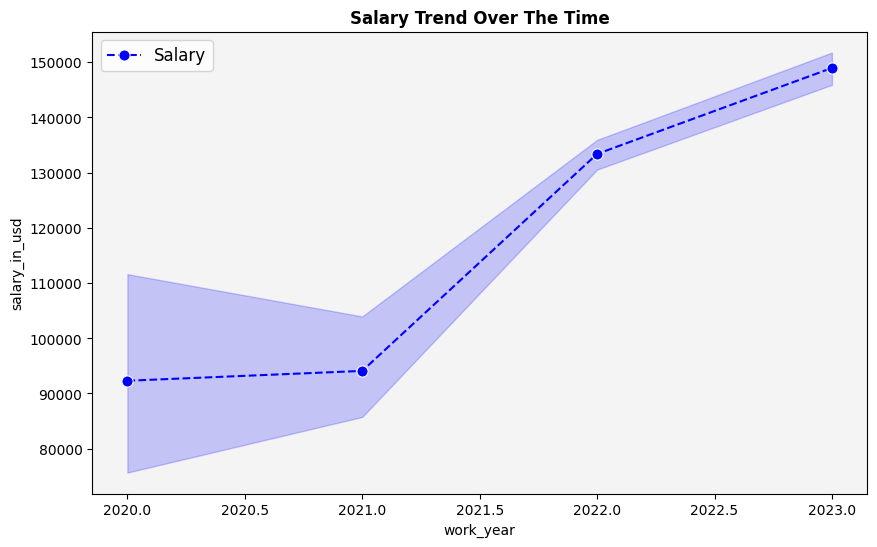

In [12]:
plt.figure(figsize = (10,6))
salary_trend = df[['salary_in_usd', 'work_year']].sort_values(by = 'work_year')
p = sns.lineplot(data =salary_trend ,x = 'work_year', y = 'salary_in_usd', marker = 'o',linestyle='--', color='Blue', markersize=8 )
plt.title('Salary Trend Over The Time', fontsize=12, fontweight='bold')

# Customize the background color
p.set_facecolor("#f4f4f4")
plt.legend(['Salary'], loc='best', fontsize=12)

# Remove the grid lines
p.grid(False)

plt.show()

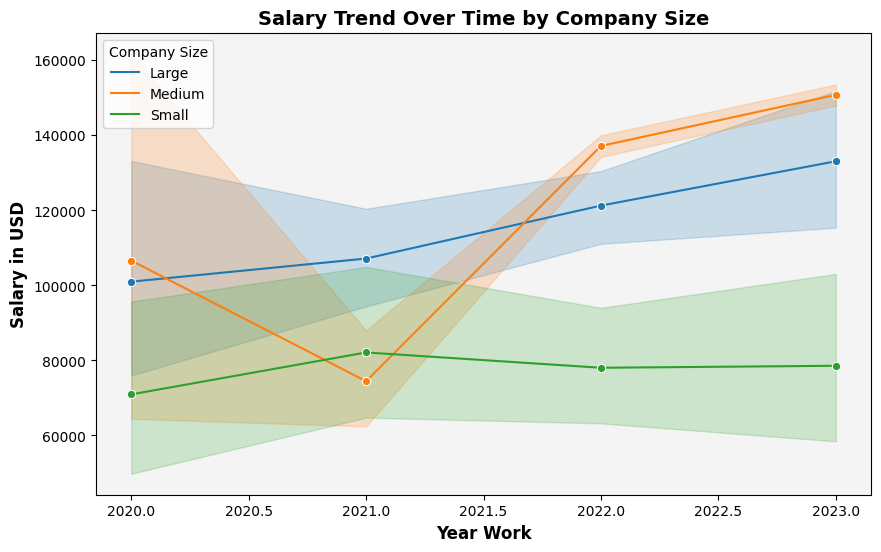

In [13]:
plt.figure(figsize=(10, 6))
p = sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='company_size', marker='o')

plt.xlabel('Year Work', fontsize=12, fontweight='bold')
plt.ylabel('Salary in USD', fontsize=12, fontweight='bold')

# Add a legend
plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper left')

# Add a title
plt.title('Salary Trend Over Time by Company Size', fontsize=14, fontweight='bold')


# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)
plt.show()

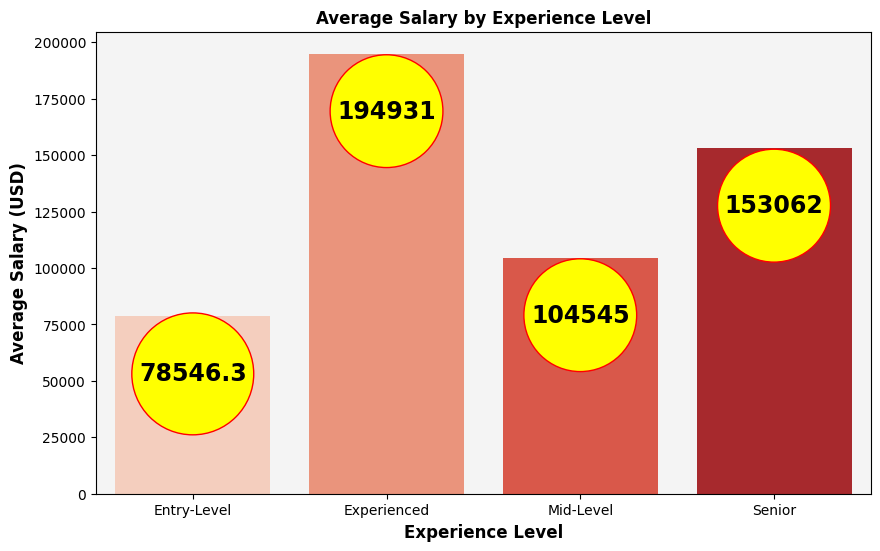

In [14]:
exp_salary = df.groupby('experience_level')['salary_in_usd'].mean()
plt.figure(figsize = (10,6))
ax = sns.barplot(x = exp_salary.index, y = exp_salary.values, palette = 'Reds')
plt.title('Average Salary by Experience Level', fontsize=12, fontweight='bold')
plt.xlabel('Experience Level', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container,
                padding = -50,
                fontsize = 17,
                bbox = {'boxstyle': 'circle', 'edgecolor': 'red', 'facecolor': 'yellow'},
                label_type="edge",
                fontweight = 'bold'
                
                
                )

# Customize the background color
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

plt.show()


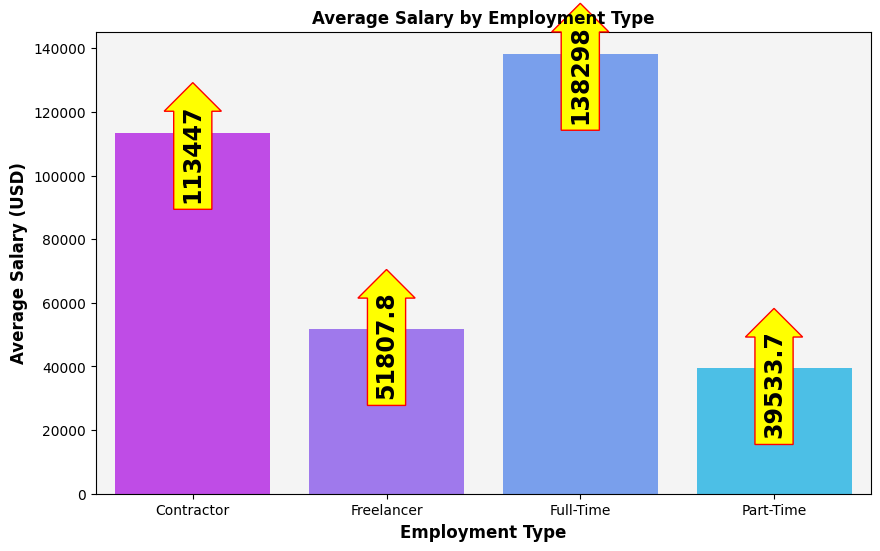

In [15]:
#Group data by 'employment_type' and calculate the average salary for each type
emp_salary = df.groupby('employment_type')['salary_in_usd'].mean()

plt.figure(figsize = (10,6))
p = sns.barplot(y = emp_salary.values, x = emp_salary.index, palette = 'cool_r')
plt.title('Average Salary by Employment Type', fontsize=12, fontweight='bold')
plt.xlabel('Employment Type', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')

for container in p.containers:
    plt.bar_label(container,
                padding = -50,
                fontsize = 17,
                bbox = {'boxstyle': 'rarrow', 'edgecolor': 'red', 'facecolor': 'yellow'},
                label_type="edge",
                fontweight = 'bold',
                rotation = 90
                      
                 )

# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)

plt.show()



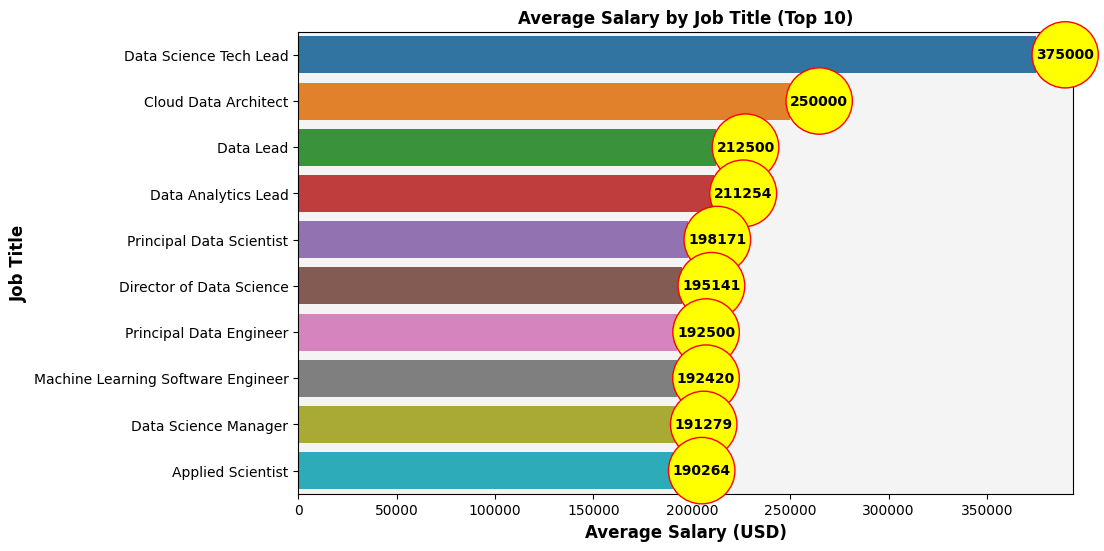

In [16]:
# Group data by 'job_title' and calculate the average salary for each title
job_title_salary= df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending = False)

plt.figure(figsize = (10,6))
p = sns.barplot(x= job_title_salary.values[:10], y = job_title_salary.index[:10])

plt.title('Average Salary by Job Title (Top 10)', fontsize=12, fontweight='bold')
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container,
                
                bbox = {'boxstyle': 'circle', 'facecolor': 'yellow', 'edgecolor': 'red'},
                fontweight = 'bold'
                
               
               )
# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)
plt.show()


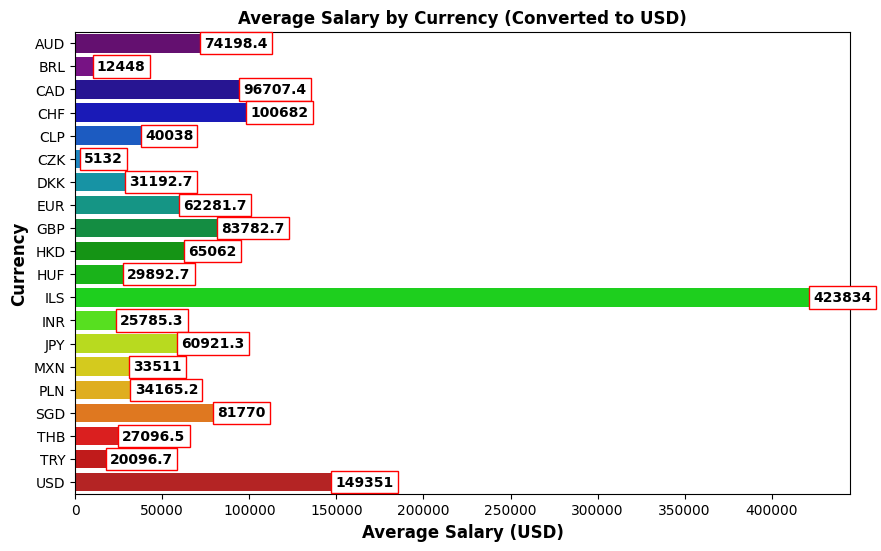

In [17]:
# Group data by 'salary_currency' and calculate the average salary in USD for each currency
currency_salary  = df.groupby('salary_currency')['salary_in_usd'].mean()

plt.figure(figsize = (10,6))
p = sns.barplot(x = currency_salary.values , y  = currency_salary.index, palette = 'nipy_spectral')
plt.title('Average Salary by Currency (Converted to USD)', fontsize=12, fontweight='bold')
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Currency', fontsize=12, fontweight='bold')


for container in p.containers:
    p.bar_label(container,
                bbox = {'boxstyle': 'square', 'facecolor': 'white', 'edgecolor': 'red'},
                fontweight = 'bold'
               
                
               )
# Customize the background color
plt.show()


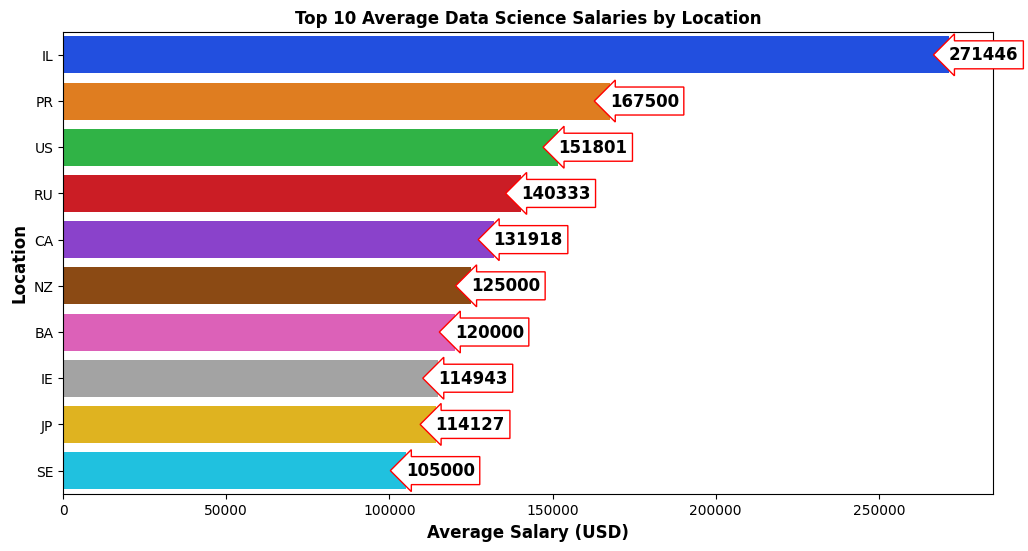

In [18]:
# Group the data by company_location and calculate the mean salary for each location
average_salaries_by_location = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Sort the locations by average salary in descending order
average_salaries_by_location = average_salaries_by_location.sort_values(by='salary_in_usd', ascending=False)

# Select the top N locations to plot
top_n_locations = 10  # You can change this number as needed

# Create a bar chart to visualize average salaries by country
plt.figure(figsize=(12, 6))
p = sns.barplot(x='salary_in_usd', y='company_location', data=average_salaries_by_location.head(top_n_locations), palette = 'bright')
plt.title('Top {} Average Data Science Salaries by Location'.format(top_n_locations), fontsize=12, fontweight='bold' )
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Location', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container,
                fontsize = 12,
                bbox = {'boxstyle': 'larrow', 'edgecolor': 'red', 'facecolor': 'white'},
                label_type="edge",
                fontweight = 'bold'
               )

# Customize the background color
ax.set_facecolor("#f4f4f4")
plt.show()



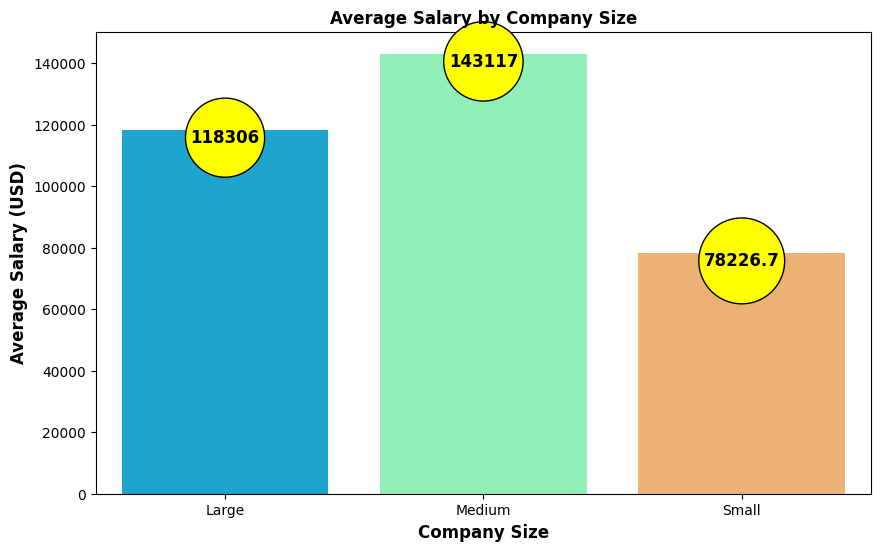

In [19]:
# Group data by 'company_size' and calculate the average salary for each size
company_size_salary = df.groupby('company_size')['salary_in_usd'].mean()

# Plot the average salary by company size
plt.figure(figsize=(10, 6))
p = sns.barplot(x=company_size_salary.index, y=company_size_salary.values, palette = 'rainbow')
plt.title('Average Salary by Company Size', fontsize=12, fontweight='bold')
plt.xlabel('Company Size',fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')


for container in p.containers:
    p.bar_label(container, fontweight = 'bold',
                padding = -12,
                fontsize=12,
                bbox = {'boxstyle': 'circle', 'facecolor': 'yellow', 'edgecolor': 'black'}
                
               )


plt.show()


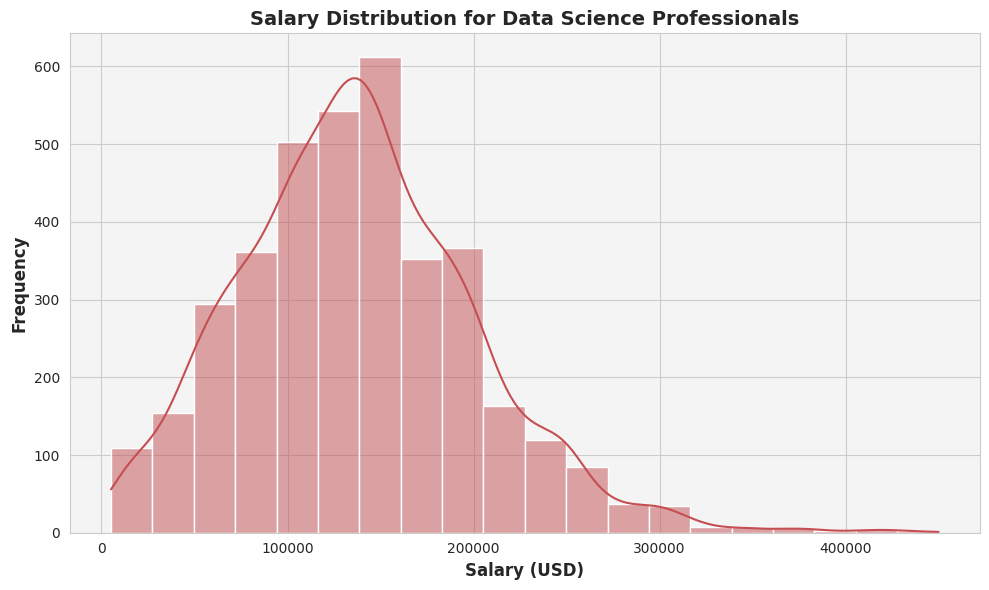

In [20]:

# Set a custom style
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(df['salary_in_usd'], kde=True, color='#c44e52', bins=20, ax=ax)

# Customize labels and title
ax.set_title('Salary Distribution for Data Science Professionals', fontsize=14, fontweight='bold')
ax.set_xlabel('Salary (USD)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')

# Remove y-axis ticks
ax.tick_params(axis='y', which='both', left=False)

# Customize the background color
ax.set_facecolor("#f4f4f4")

# Show the plot
plt.tight_layout()
plt.show()


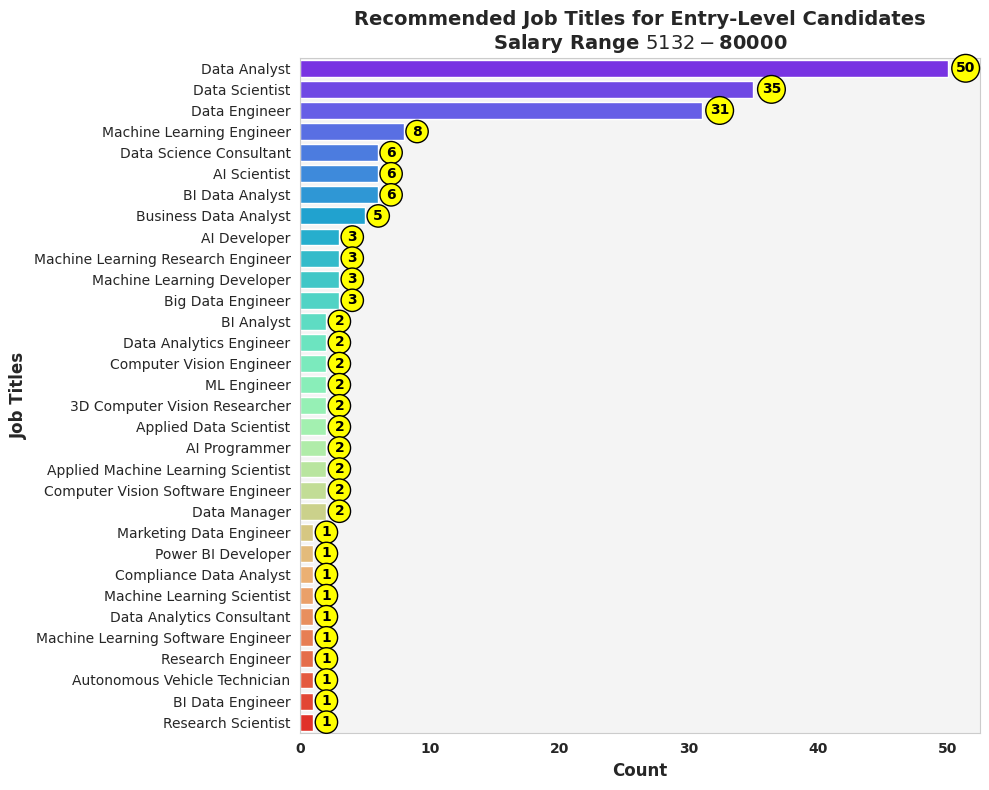

In [21]:
# Define candidate criteria
desired_experience_level = 'Entry-Level'
desired_salary_range = (5132, 80000)  # Replace with the desired salary range in USD

# Filter the dataset based on experience level and desired salary range
filtered_df = df[(df['experience_level'] == desired_experience_level) &
                 (df['salary_in_usd'] >= desired_salary_range[0]) &
                 (df['salary_in_usd'] <= desired_salary_range[1])]

# Count the occurrences of each job title
job_title_counts = filtered_df['job_title'].value_counts().reset_index()
job_title_counts.columns = ['Job Title', 'Count']

# Create a horizontal bar chart using Seaborn with a different color palette
plt.figure(figsize=(10, 8))



ax = sns.barplot(x='Count', y='Job Title', data=job_title_counts, palette = 'rainbow')
plt.xlabel('Count', fontsize=12, fontweight='bold')
plt.ylabel('Job Titles', fontsize=12, fontweight='bold')
plt.title(f'Recommended Job Titles for {desired_experience_level} Candidates\nSalary Range ${desired_salary_range[0]} - ${desired_salary_range[1]}', fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container, label_type="edge", color="black",
                 padding=6,
                 fontweight='bold',
                 fontsize=10,
                 bbox={'boxstyle': 'circle,pad=0.3', 'facecolor': 'yellow', 'edgecolor': 'black'})

# Customize the background color
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

# Show the chart
plt.tight_layout()
plt.show()


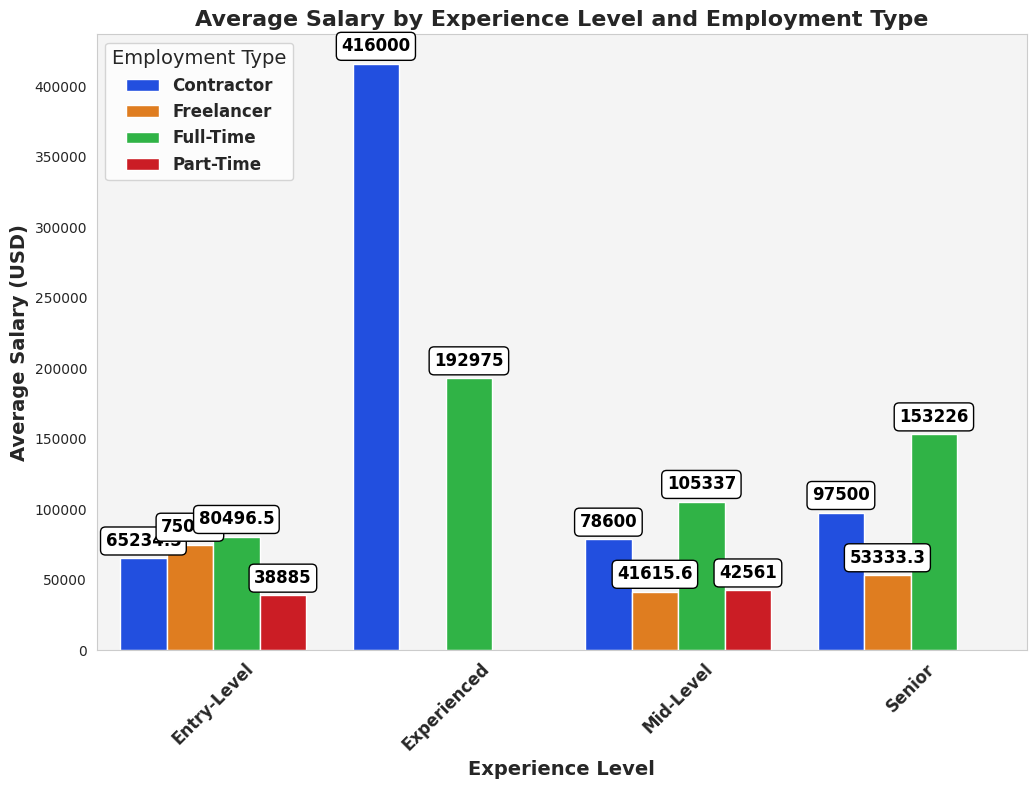

In [22]:
# Calculate average salary for each combination of experience level and employment type
cost_effectiveness = df.groupby(['experience_level', 'employment_type'])['salary_in_usd'].mean().reset_index()

# Find the combination with the highest average salary (maximum cost-effectiveness)
best_combination = cost_effectiveness.loc[cost_effectiveness['salary_in_usd'].idxmax()]

# Create a bar plot using Seaborn with x and y axes swapped
plt.figure(figsize=(12, 8))

# Use a different color palette for a modern look
sns.set_palette(sns.color_palette('bright'))

ax = sns.barplot(x='experience_level', y='salary_in_usd', hue='employment_type', data=cost_effectiveness)
plt.xlabel('Experience Level', fontsize=14, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=14, fontweight='bold')
plt.title('Average Salary by Experience Level and Employment Type', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container, label_type="edge", color="black",
                 padding=6,
                 fontweight='bold',
                 fontsize=12,
                 bbox={'boxstyle': 'round,pad=0.3', 'facecolor': 'white', 'edgecolor': 'black'})

# Increase legend font size and make it bold
legend = plt.legend(title='Employment Type', fontsize=12, title_fontsize=14)
for text in legend.get_texts():
    text.set_fontweight('bold')

# Set the background color to a light gray
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

# Show the plot
plt.show()


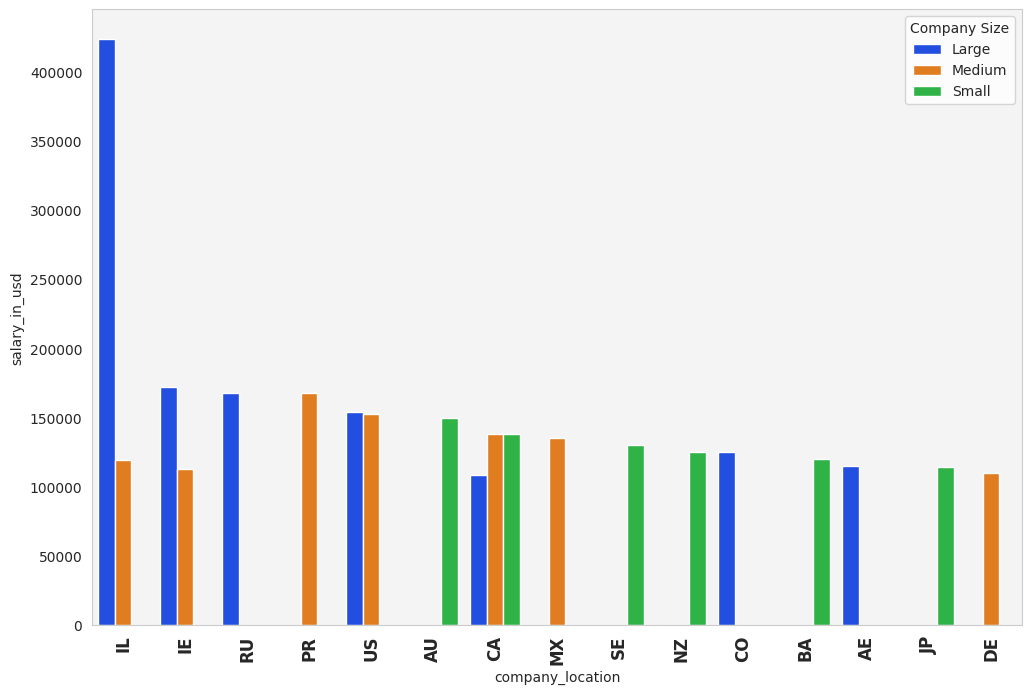

In [23]:
cost_effectiveness = df.groupby(['company_location', 'company_size'])['salary_in_usd'].mean().reset_index().sort_values(by = 'salary_in_usd', ascending = False)[:20]

# Find the combination with the highest average salary (maximum cost-effectiveness)
best_combination = cost_effectiveness.loc[cost_effectiveness['salary_in_usd'].idxmax()]

# Create a bar plot using Seaborn with x and y axes swapped
plt.figure(figsize=(12, 8))

# Use a different color palette for a modern look
sns.set_palette(sns.color_palette('bright'))

ax = sns.barplot(x='company_location', y='salary_in_usd', hue='company_size', data=cost_effectiveness)
plt.xticks(rotation=90, fontsize=12, fontweight='bold')


lg = plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper right')


# Set the background color to a light gray
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

# Show the plot
plt.show()


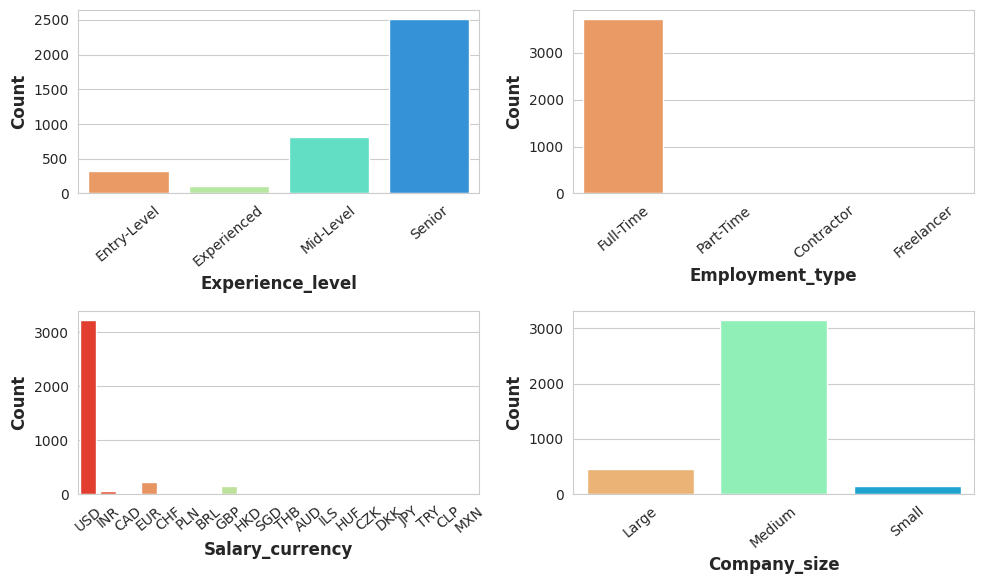

In [24]:
fig, axis = plt.subplots(2, 2, figsize=(10, 6))
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})

columns = ['experience_level', 'employment_type', 'salary_currency', 'company_size']
axis = axis.flatten()
for i, col in enumerate(columns):
    p = sns.countplot(data=df, x=df[col], ax=axis[i], palette= "rainbow_r")
    axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=40)
    axis[i].set_xlabel(col.capitalize(), fontsize=12, fontweight='bold')
    axis[i].set_ylabel('Count', fontsize=12, fontweight='bold')

# Remove any remaining empty subplots
for j in range(len(columns), len(axis)):
    fig.delaxes(axis[j])

    
plt.tight_layout()
plt.show()


<center> <img src="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/87481-of-thanks-letter-text-logo-calligraphy-drawing%20(1).png" style='width: 600px; height: 300px;'>

# Sincerely, Dr. Eslam Fouad.